## Plotly exploration
Learning how to visualize data in plotly and recreating familiar seaborn/matplotlib plots as interactive plotly figures.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import plotly

In [ ]:
#set to notebook for interactive plots
#set to png to render plots on github
pio.renderers.default = 'notebook'
plotly.__version__

## Scatter/Line plots with Express

In [ ]:
fig = go.Figure(
    data = [go.Bar(y = [2, 1, 3])],
    layout_title_text = "Simple bar chart"
)
#can change renderer on the fly during fig.show()
fig.show(renderer="notebook", width=800, height=500)

In [ ]:
fig = px.scatter(x=[0, 1, 2, 3, 4], 
                 y=[0, 1, 4, 9, 16])
fig

In [ ]:
iris = px.data.iris()
fig = px.scatter(iris,
                 x="petal_length",
                 y="sepal_length")
fig

In [ ]:
iris.head(3)

In [ ]:
fig = px.scatter(iris, 
                 x          ="sepal_width",
                 y          ="sepal_length",
                 color      ="species",
                 size       ='petal_length',
                 labels={'sepal_width':'Sepal Width',
                         'sepal_length':'Sepal Length'},
                 hover_data =['petal_width', 'petal_length'])\
                .for_each_trace(lambda t: t.update(name=t.name.replace("species=","")))


fig.show()

In [ ]:
t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.sin(t), labels={'x':'t', 'y':'sin(t)'})
fig.show()

In [ ]:
gapminder = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(gapminder,
              x          ="year",
              y          ="lifeExp",
              color      ="country",
              hover_data =['pop', 'gdpPercap'])\
              .for_each_trace(lambda t: t.update(name=t.name.replace("country=","")))
fig

In [126]:
import plotly.figure_factory as ff
import plotly.express as px

z = [[1,2,3],
     [4,5,6],
     [7,8,9]]

px.imshow(img=z, zmax=9)

In [129]:
import plotly.figure_factory as ff

z = [[1,2,3],
     [4,5,6],
     [7,8,9]]

fig = ff.create_annotated_heatmap(z, colorscale='Magma')
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig

In [115]:
import plotly.figure_factory as ff

z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]

fig = ff.create_annotated_heatmap(z)
fig.show()

In [116]:
%matplotlib inline

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


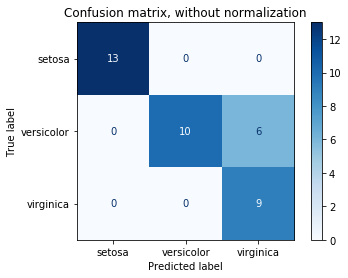

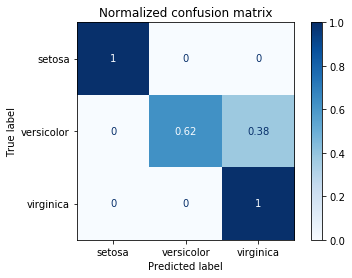

In [117]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [118]:
import numpy as np
from sklearn.decomposition import PCA

a = np.random.randn(1000,10)
b = 2*np.copy(a)
np.random.shuffle(b)

cat = np.concatenate((a,b),axis=1)
print(cat.shape)
c = PCA(n_components=5).fit_transform(cat)
s = PCA(n_components=5).fit_transform(a) + PCA(n_components=5).fit_transform(b)
print(c[0])
print(s[0])
# Applying linear reg
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(c, s)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(c), s))

(1000, 20)
[ 0.79 -3.74 -2.46  2.89 -0.35]
[ 1.45 -1.88 -3.58  0.28 -0.57]
0.739431015809064


In [119]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

n_dims = 20
#n_components = 5
a = np.random.randn(100,n_dims)
b = 2*np.copy(a)+np.random.randn(n_dims)

np.random.shuffle(b)

In [120]:
cat = np.concatenate((a,b),axis=1)
print(cat.shape)
pca_args = dict(n_components=5,svd_solver='full', random_state = 1)
c = PCA(**pca_args).fit_transform(cat)
s = PCA(**pca_args).fit_transform(a) \
    + PCA(**pca_args).fit_transform(b)

print(c[0])
print(s[0])
# Applying linear reg
regressor = LinearRegression().fit(c, s)
# Checking the accuracy
print(r2_score(regressor.predict(c), s))

(100, 40)
[-2.34  2.44  0.14  4.85  1.78]
[-2.06  3.21  3.63  4.74 -0.3 ]
0.7398871291814149


In [122]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]

corr = [2, 4, 6, 8, 10]
corr, p_value = pearsonr(c[:,0], s[:,0])
print(str(corr) + '\n' + str(p_value))

0.7932428470188281
7.747697855891539e-23
